In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [2]:
# Load the datasets
customers = pd.read_csv(r'C:\Users\DELL\Downloads\Customers.csv')
products = pd.read_csv(r'C:\Users\DELL\Downloads\Products.csv')
transactions = pd.read_csv(r'C:\Users\DELL\Downloads\Transactions.csv')


In [3]:
# Merge customer profile and transaction data
customer_data = pd.merge(customers, transactions, on='CustomerID')
customer_data['TotalValue'] = customer_data.groupby('CustomerID')['TotalValue'].transform('sum')
customer_data = customer_data.drop_duplicates(subset=['CustomerID'])

In [4]:
# Prepare features for clustering
cluster_features = customer_data[['TotalValue', 'Quantity', 'Region']]
cluster_features = pd.get_dummies(cluster_features, columns=['Region'])

In [5]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features)

In [6]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(cluster_features_scaled)

In [7]:
# Calculate DB Index
db_index = davies_bouldin_score(cluster_features_scaled, customer_data['Cluster'])
print("DB Index:", db_index)

DB Index: 0.8079480373413537


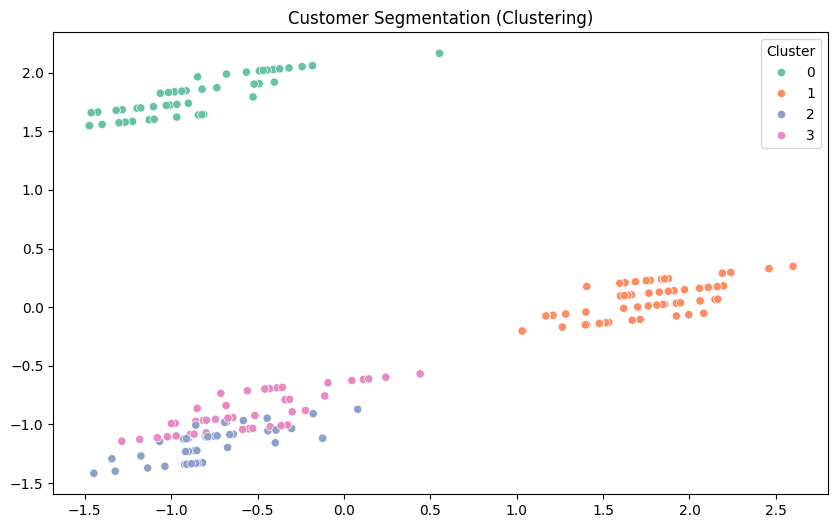

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(cluster_features_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_data['Cluster'], palette='Set2')
plt.title('Customer Segmentation (Clustering)')
plt.show()


In [9]:
# Save the clustering result to a CSV
customer_data[['CustomerID', 'Cluster']].to_csv('Customer_Segmentation.csv', index=False)
print("Customer segmentation completed. Output saved to Customer_Segmentation.csv.")

Customer segmentation completed. Output saved to Customer_Segmentation.csv.


In [11]:
customer_data.to_csv(r'C:\Users\DELL\Downloads\customer_segmentation.csv', index=False)
